<a href="https://colab.research.google.com/github/S-Chakra/applied-ml-biotech/blob/main/medical-insurance-cost-prediction/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample Test data: [link text](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset)

System Specifications

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

In [ ]:
!cat /proc/meminfo

MemTotal:       13290460 kB
MemFree:         9570896 kB
MemAvailable:   11805056 kB
Buffers:          399916 kB
Cached:          2007028 kB
SwapCached:            0 kB
Active:           796116 kB
Inactive:        2606744 kB
Active(anon):       3424 kB
Inactive(anon):  1006588 kB
Active(file):     792692 kB
Inactive(file):  1600156 kB
Unevictable:           8 kB
Mlocked:               8 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               300 kB
Writeback:             0 kB
AnonPages:        995964 kB
Mapped:           372172 kB
Shmem:             14052 kB
KReclaimable:     164504 kB
Slab:             207908 kB
SReclaimable:     164504 kB
SUnreclaim:        43404 kB
KernelStack:        5908 kB
PageTables:        18600 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645228 kB
Committed_AS:    3162680 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       12216 kB
VmallocChunk:    

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [ ]:
#loading data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
#first 5 rows of DataFrame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#num of rows and cols
insurance_dataset.shape

(1338, 7)

In [ ]:
#getting info on DataSet
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Catagorical features:
- sex
- smoker
- region

In [ ]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
#statistical measures of DataSet
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#global color scheme
sns.set(style="whitegrid")
colorScheme = sns.color_palette("Set1")
sns.set_palette(colorScheme)

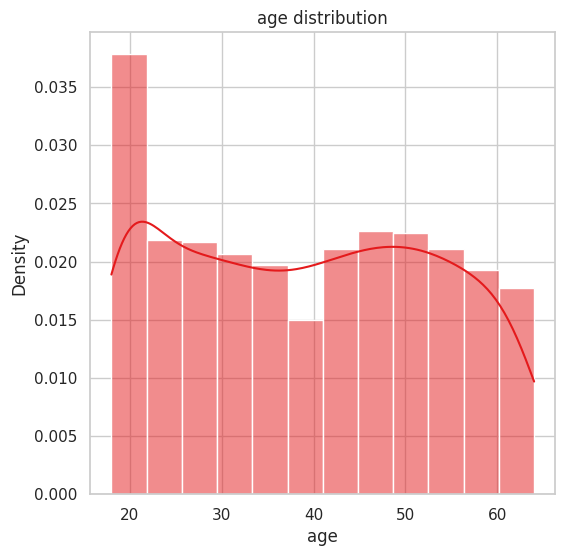

In [ ]:
#distribution of age
plt.figure(figsize=(6,6)) #plot size
sns.histplot(insurance_dataset['age'], kde=True, stat='density') #how the values are distributed throughout the DataSet
plt.title('age distribution')
plt.show()

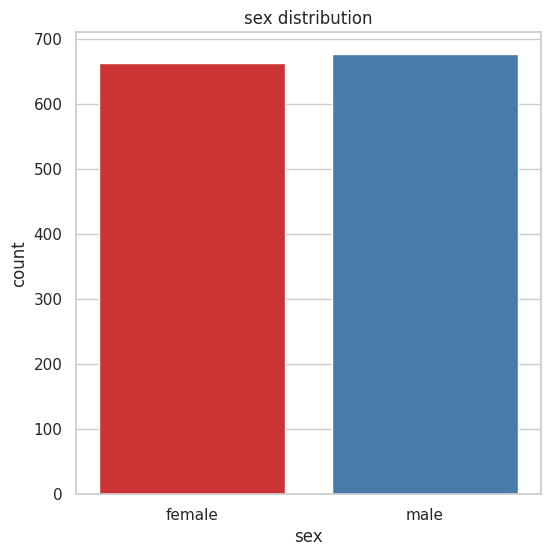

In [ ]:
#distribution of sex
plt.figure(figsize=(6,6))
sns.countplot(x='sex', hue='sex', data=insurance_dataset, palette=colorScheme[:2])
plt.title('sex distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

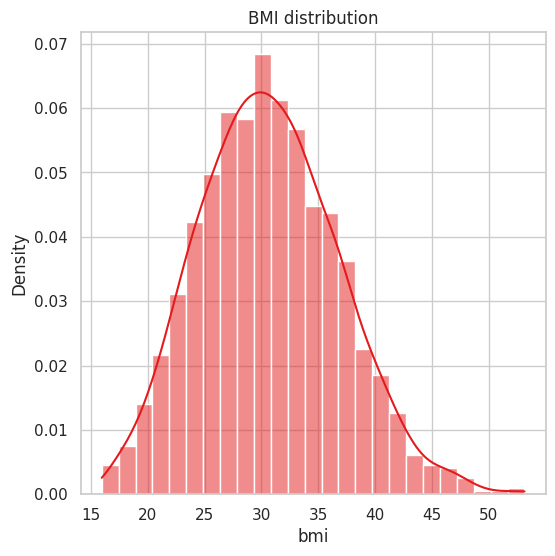

In [ ]:
#distribution of BMI
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True, stat='density')
plt.title('BMI distribution')
plt.show()

Normal BMI range --> (18.5 - 24.9)

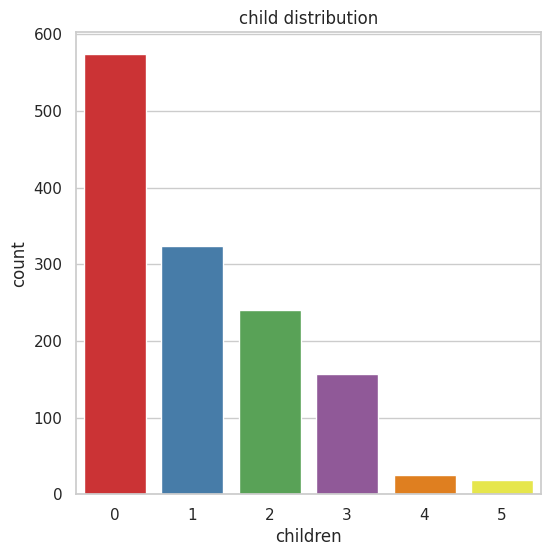

In [ ]:
#distribution of children
plt.figure(figsize=(6,6))
sns.countplot(x='children', hue='children', data=insurance_dataset, palette=colorScheme[:insurance_dataset['children'].nunique()], legend=False)
plt.title('child distribution')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

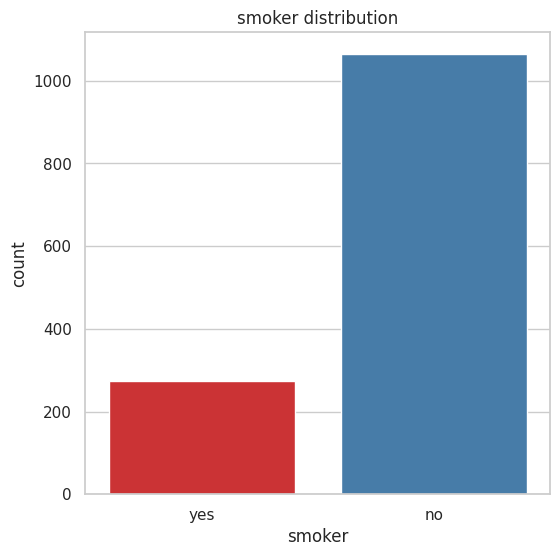

In [ ]:
#distribution of smokers
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', hue='smoker', data=insurance_dataset, palette=colorScheme[:insurance_dataset['smoker'].nunique()], legend=False)
plt.title('smoker distribution')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

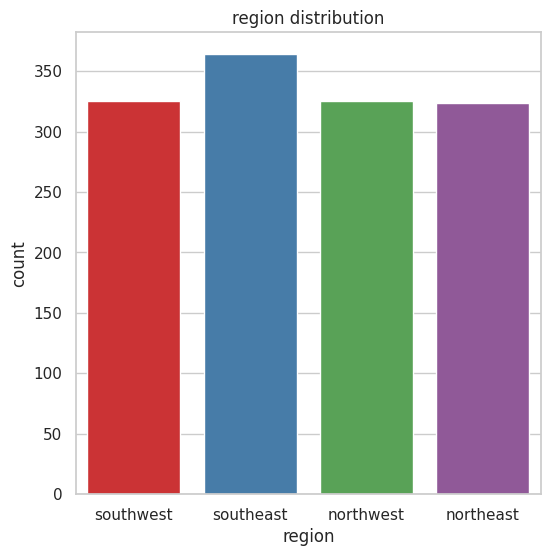

In [ ]:
#distribution of region
plt.figure(figsize=(6,6))
sns.countplot(x='region', hue='region', data=insurance_dataset, palette=colorScheme[:insurance_dataset['region'].nunique()], legend=False)
plt.title('region distribution')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

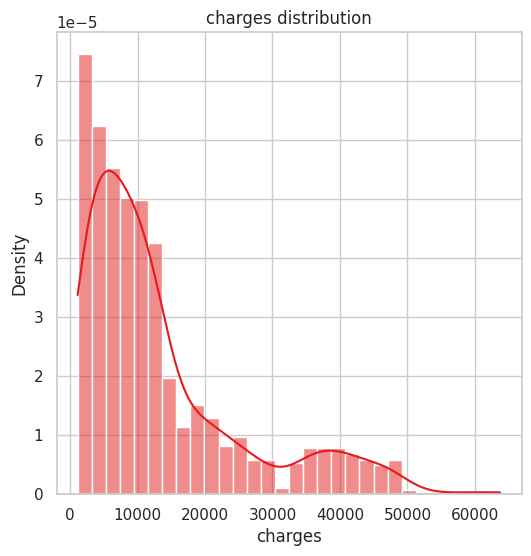

In [ ]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'], kde=True, stat='density')
plt.title('charges distribution')
plt.show()

Data Pre-Processing
- Encoding the categorical features

In [ ]:
#encoding sex data
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding smoker data
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region data
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data &Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression Model

In [ ]:
#loading the model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#predicting training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#R^2 value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.751505643411174


In [ ]:
#predicting test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
#R^2 value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684076


Building Predictive System

In [ ]:
#input user data in numbers only
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
